In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data = {
    'Patient_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
    'Dose_mg': [0, 5, 10, 17, 20, 22, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110],
    'Reduction_Pain_%': [0.0, 2.0, 5.0, None, 10.0, None, 33.0, 45.0, 70.0, 80.0, 
                         87.0, 87.0, 88.0, 85.0, 85.0, 85.0, 80.0]
}
df = pd.DataFrame(data)

In [3]:
df

,Patient_ID,Dose_mg,Reduction_Pain_%
0,1,0,0.0
1,2,5,2.0
2,3,10,5.0
3,4,17,NaN
4,5,20,10.0
5,6,22,NaN
6,7,25,33.0
7,8,30,45.0
8,9,35,70.0
9,10,40,80.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Patient_ID        17 non-null     int64  
 1   Dose_mg           17 non-null     int64  
 2   Reduction_Pain_%  15 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 540.0 bytes


In [24]:
messing = df.isna().sum()
messing

Patient_ID          0
Dose_mg             0
Reduction_Pain_%    2
dtype: int64

In [25]:
total = df.shape[0]  
pourcentage = ( messing / total )*100
result_table = pd.DataFrame({
    'Nombre de valeurs manquantes': messing,
    'Fréquence des valeurs manquantes (%)':pourcentage
})
result_table

,Nombre de valeurs manquantes,Fréquence des valeurs manquantes (%)
Patient_ID,0,0.000000
Dose_mg,0,0.000000
Reduction_Pain_%,2,11.764706


<Axes: xlabel='Dose_mg', ylabel='Reduction_Pain_%'>

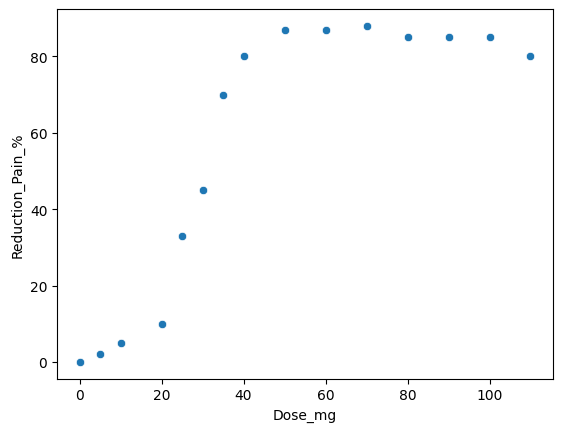

In [26]:
sns.scatterplot(data = df , x='Dose_mg' , y='Reduction_Pain_%')

# Remplir les valeurs manquantes avec KNN en Python

### Contexte
Lorsque j'ai tracé un graphe de dispersion avec `scatterplot`, j'ai observé une **relation non linéaire**. Par conséquent, la meilleure solution pour remplacer les valeurs manquantes est d'utiliser **KNN (K-Nearest Neighbors)**.

### Installation de la bibliothèque `scikit-learn` :
Si vous ne l'avez pas encore installée, utilisez cette commande :

```bash
pip install scikit-learn


In [27]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.impute import KNNImputer

In [29]:
missing_mask = df['Reduction_Pain_%'].isna()

In [30]:
imputer = KNNImputer(n_neighbors=3)

In [31]:
df_filled = df.copy()
df_filled[['Dose_mg', 'Reduction_Pain_%']] = imputer.fit_transform(df[['Dose_mg', 'Reduction_Pain_%']])

In [32]:
df_filled

,Patient_ID,Dose_mg,Reduction_Pain_%
0,1,0.0,0.000000
1,2,5.0,2.000000
2,3,10.0,5.000000
3,4,17.0,16.000000
4,5,20.0,10.000000
5,6,22.0,29.333333
6,7,25.0,33.000000
7,8,30.0,45.000000
8,9,35.0,70.000000
9,10,40.0,80.000000


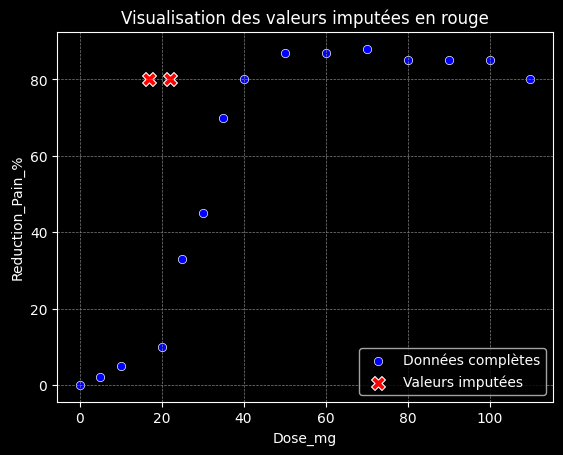

In [54]:
sns.scatterplot(data=df_filled, x='Dose_mg', y='Reduction_Pain_%', label='Données complètes', color='blue')
sns.scatterplot(data=df_filled[missing_mask], x='Dose_mg', y='Reduction_Pain_%', label='Valeurs imputées', color='red', marker='X', s=100)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.title('Visualisation des valeurs imputées en rouge')
plt.legend()
plt.show()

# Implutation Avec `Moyenne`

In [35]:
mean_value = df['Reduction_Pain_%'].mean()

In [36]:
df_filled = df.copy()
df_filled['Reduction_Pain_%'] = df['Reduction_Pain_%'].fillna(mean_value)
df_filled

,Patient_ID,Dose_mg,Reduction_Pain_%
0,1,0,0.000000
1,2,5,2.000000
2,3,10,5.000000
3,4,17,56.133333
4,5,20,10.000000
5,6,22,56.133333
6,7,25,33.000000
7,8,30,45.000000
8,9,35,70.000000
9,10,40,80.000000


In [37]:
missing_mask = df['Reduction_Pain_%'].isna()

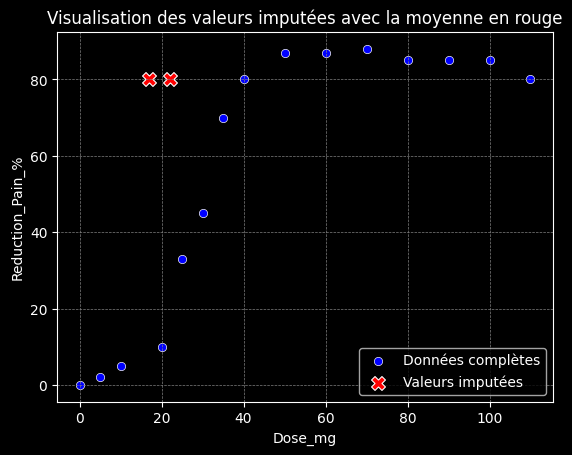

In [53]:
sns.scatterplot(data=df_filled, x='Dose_mg', y='Reduction_Pain_%', label='Données complètes', color='blue')
sns.scatterplot(data=df_filled[missing_mask], x='Dose_mg', y='Reduction_Pain_%', label='Valeurs imputées', color='red', marker='X', s=100)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.title('Visualisation des valeurs imputées avec la moyenne en rouge')
plt.legend()
plt.show()

# implutation avec `Mediane`

In [41]:
median_value = df['Reduction_Pain_%'].median()

In [42]:
df_filled = df.copy()
df_filled['Reduction_Pain_%'] = df['Reduction_Pain_%'].fillna(mean_value)
df_filled

,Patient_ID,Dose_mg,Reduction_Pain_%
0,1,0,0.0
1,2,5,2.0
2,3,10,5.0
3,4,17,80.0
4,5,20,10.0
5,6,22,80.0
6,7,25,33.0
7,8,30,45.0
8,9,35,70.0
9,10,40,80.0


In [43]:
missing_mask = df['Reduction_Pain_%'].isna()

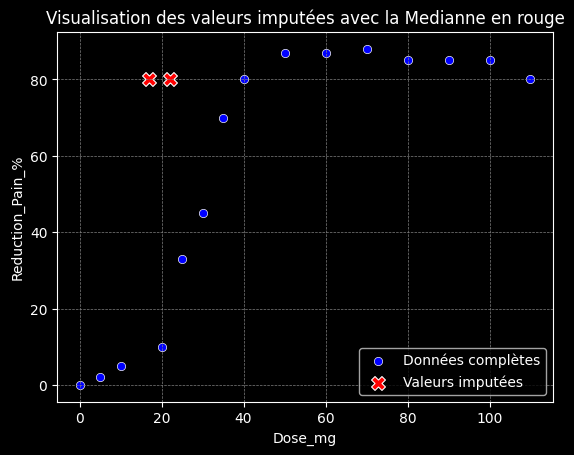

In [51]:
sns.scatterplot(data=df_filled, x='Dose_mg', y='Reduction_Pain_%', label='Données complètes', color='blue')
sns.scatterplot(data=df_filled[missing_mask], x='Dose_mg', y='Reduction_Pain_%', label='Valeurs imputées', color='red', marker='X', s=100)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.title('Visualisation des valeurs imputées avec la Medianne en rouge')
plt.legend()
plt.show()

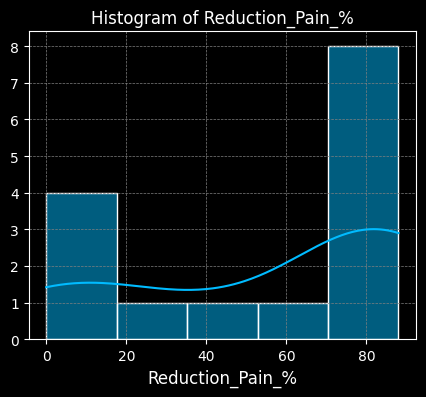

In [48]:
plt.style.use('dark_background')
plt.figure(figsize = (5,4))
sns.histplot(data=df, x='Reduction_Pain_%', kde=True, color='#00bbff')
plt.title('Histogram of Reduction_Pain_%')
plt.xlabel('Reduction_Pain_%', fontsize=12, color='white')
plt.ylabel('') 
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()